In [5]:
import numpy as np
from lib import diptrap
import matplotlib.pyplot as plt

From the experiment of Genuary 12 we mesured the lifetime of the dipole trap.
with 120 mW of power we measured 800 ms of life, in the simulation we assume $  $
if we consider the model 
$$
\frac{d}{dt} N = R -\gamma N - \beta N(N-1)
$$
During the life-time experiment the rates $R$ and $\beta$ are equal to 0.
so, given a initial number of atoms $N_0$ the dynamics of the system is
$$
\frac{d}{dt} N = -\gamma N \ \Rightarrow \ N(t) = N_0 e^{-\gamma t}
$$


In [6]:
time = 1 # in milliseconds
steps = 1000
burst = time

trunc = 150
R = 100
gamma = 0.005
beta = 0.09

v0 = np.zeros(trunc)
v0[0] = 1

my_trap_1 = diptrap.markov_chain_FORT(R=R, gamma=gamma, beta=beta, truncation_size=trunc, method="model_1")
my_trap_1.evolve(v0, time, steps, burst)

#my_trap_2 = diptrap.markov_chain_FORT(R=R, gamma=gamma, beta=beta, truncation_size=trunc, method="model_2")
#my_trap_2.evolve(v0, time, steps, burst)

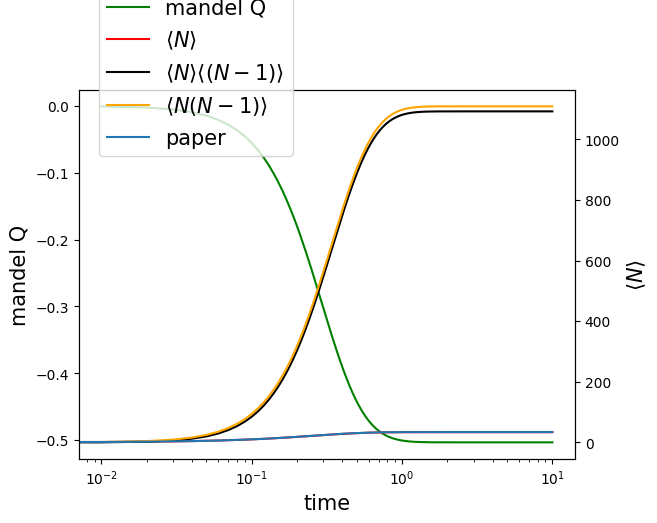

In [7]:
my_trap_1.plot_mandel_Q(scale="log")
#my_trap_2.plot_mandel_Q()

mean =  12.62 +- 1.9482299658921172
Q =  -0.6992393026941364


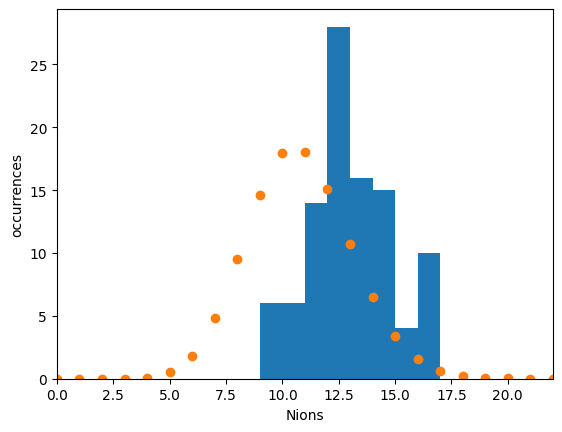

In [4]:
name = "F-2022-12-21-0003.txt"

occurrences = []
data = open("data/2022-12-21/"+name, "r")

for row in data:
    row = row.replace("\n", "")
    row = row.replace(",", ".")
    terms = row.split("\t")
    occurrences.append(float(terms[2]))

mu = np.mean(occurrences)
std = np.std(occurrences)
x = np.arange(int(min(occurrences)), int(max(occurrences)))
#y = [poissonian(xx, mu)*len(occurrences) for xx in x]

print("mean = ", mu, "+-", std)
print("Q = ", std**2/mu-1)

#plt.plot(x+0.5, y, marker="o", linestyle="", label="ideal")
plt.hist(np.array(occurrences), bins=x, label="measured")
#plt.vlines(mu+0.5, 0, max(y)+1, color="gray", linestyle="--", label="mean")
#plt.legend()
plt.xlabel("Nions")
plt.ylabel("occurrences")

plt.plot(my_trap_1.evo.y[:,-1]*max(occurrences)/max(my_trap_1.evo.y[:,-1]), "o")
plt.xlim([0,22])
plt.show()